# Unsupervised Learning

### Practical 1 (Solutions)

We consider an oceanographic data set consisting of $n=2500$ measurements of water temperature (degrees Celsius), water depth (metre), salinity (Practical Salinity Scale, PSS), and oxygen content (millilitres per litre of water). The data set considered here is a subsetof much larger data set of almost a million measurements, available from https://www.kaggle.com/sohier/calcofi/. The subset in question can be read in via

In [1]:
ocean <-read.table("http://www.maths.dur.ac.uk/~dma0je/Data/ocean.dat",header=TRUE, sep=",")

The dimension, and the first six rows, of `ocean` are displayed as follows 

In [2]:
dim(ocean)
head(ocean)

[1] 2500    4

,Temp,Depth,Sal,O2
,<dbl>,<int>,<dbl>,<dbl>
1,11.01,75,33.099,4.99
2,1.78,2600,34.637,2.22
3,21.42,10,33.712,5.26
4,9.17,97,33.822,2.96
5,5.51,462,34.230,0.70
6,14.95,66,33.380,5.94


Let's carry out some simple explanatory analysis.  Histograms of the four involved variables can be displayed via

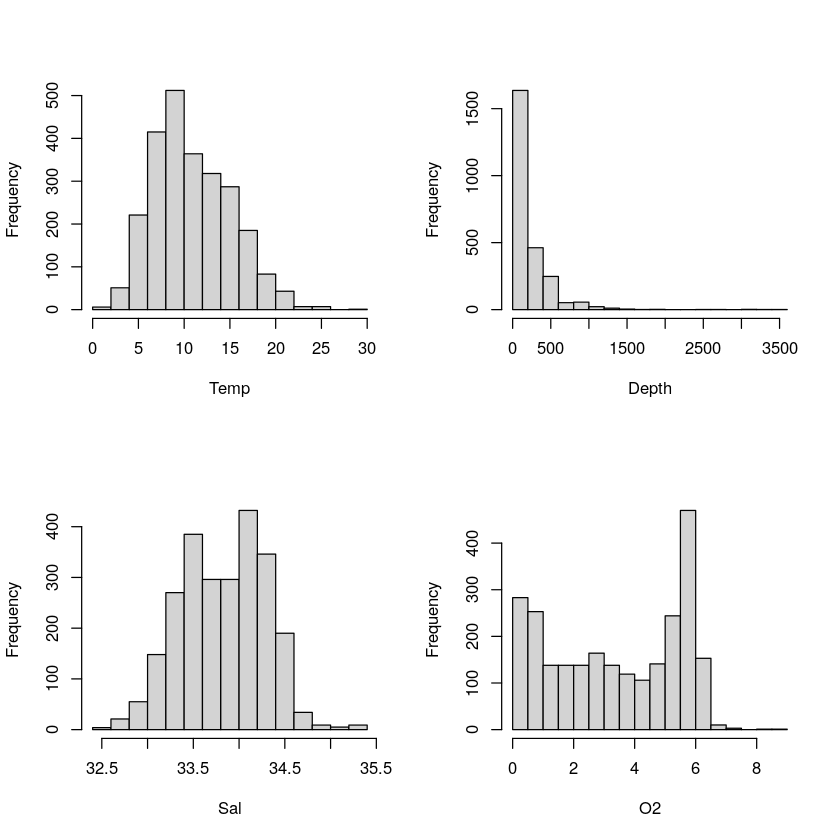

In [3]:
par(mfrow=c(2,2))
for (j in 1:4){hist(ocean[,j], xlab=colnames(ocean)[j], main="")}

We next proceed with a "pairs plot", which gives all $2 \times 2$ scatterplots of the four variables. These can be thought of as pairwise, bivariate projections of the original four-dimensional data onto the respective bivariate spaces (Note: It may take a few seconds until the image materializes). 

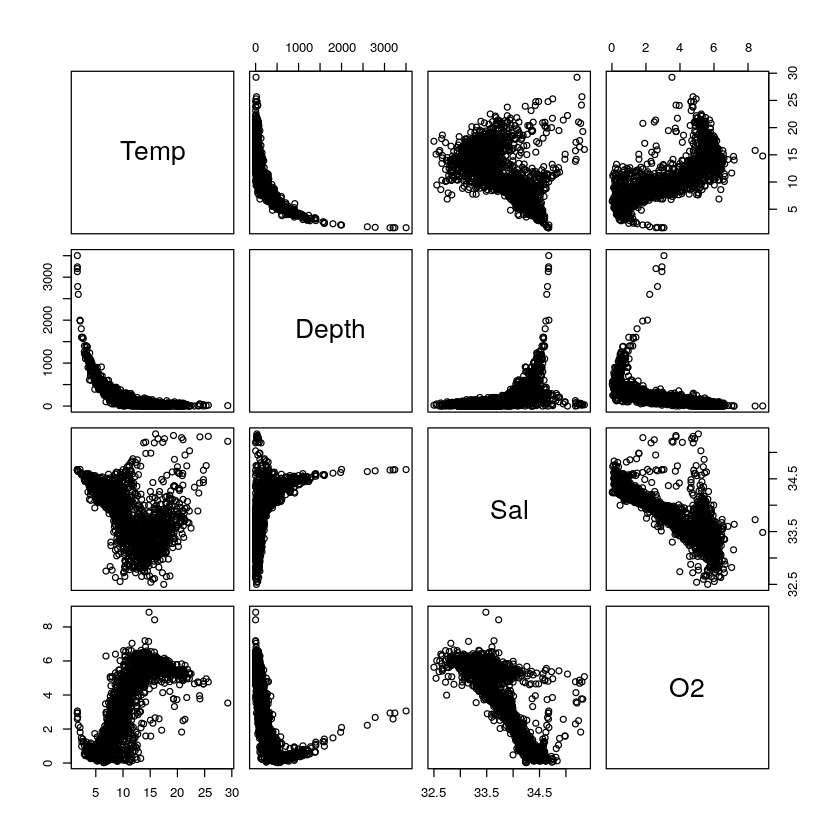

In [4]:
pairs(ocean)

We proceed with producing some simple data summaries. Find the mean vector and the variance matrix of `ocean`, and save them into objects `m` and `Sigma`, respectively.

In [5]:
m     <- colMeans(ocean)
Sigma <- var(ocean)
m
Sigma

Temp     Depth       Sal        O2 
 10.89132 218.54760  33.82594   3.40877

,Temp,Depth,Sal,O2
Temp,17.774113,-850.31187,-1.0359905,7.1151393
Depth,-850.311868,80833.66920,79.7817657,-394.6233548
Sal,-1.035990,79.78177,0.2125981,-0.8104315
O2,7.115139,-394.62335,-0.8104315,4.3887447


Additionally, please produce the correlation matrix. Display it and save it into an object `R`.

In [6]:
R <- cor(ocean)
R

,Temp,Depth,Sal,O2
Temp,1.0000000,-0.7093950,-0.5329446,0.8055997
Depth,-0.7093950,1.0000000,0.6085942,-0.6625467
Sal,-0.5329446,0.6085942,1.0000000,-0.8390086
O2,0.8055997,-0.6625467,-0.8390086,1.0000000


A nice way of visualizing a correlation matrix is the function `corrplot`. Execute the following, and make it clear to yourself what is displayed:

Loading required package: corrplot

corrplot 0.84 loaded



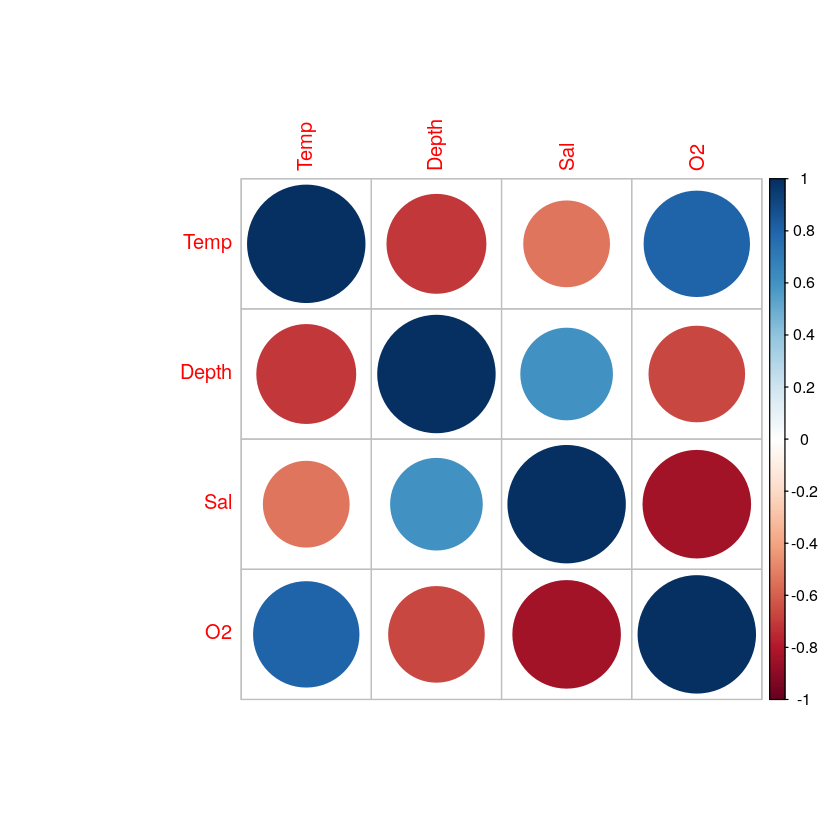

In [7]:
require(corrplot)
corrplot(R)

Next, we aim to identify potential clusters of the `ocean` data. Therefore, apply `kmeans` onto the `ocean` data, initially with $K=3$ cluster centres, using the default settings of all other options in `kmeans`.  

In [8]:
ocean.kmeans3 <- kmeans(ocean, centers=3)

Display the estimated cluster centres, as welll as the value of the total within-sum of squares:

In [9]:
ocean.kmeans3$cluster
ocean.kmeans3$tot.withinss

[1] 2 3 2 2 1 2 2 1 2 2 2 1 3 1 2 1 1 1 2 2 2 2 2 2 2 2 3 2 2 2 2 1 2 2 1 2 1
  [38] 3 1 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 2 3 2 1 2 2 1 2 1 1 1 2 2 2 2 1 1 2 2 2
  [75] 2 2 2 2 2 2 2 3 2 2 2 2 1 1 1 2 2 1 2 1 1 2 2 2 2 1 2 1 2 1 2 1 1 2 1 2 2
 [112] 2 2 2 1 2 2 2 2 2 2 2 2 2 3 2 3 2 1 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 1 2 2 3
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 2 2 2 3 1 2 1 2 3 2 1 3 1 2 1 1
 [186] 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2
 [223] 2 1 2 2 1 2 2 1 3 1 1 2 2 2 2 1 2 1 3 1 1 1 2 2 2 1 2 1 1 1 1 2 1 2 2 2 2
 [260] 1 1 1 2 1 2 2 2 1 1 2 2 2 2 1 2 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 1 2 2 2 2 2
 [297] 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1
 [334] 2 2 2 2 2 2 2 2 2 3 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1
 [371] 2 2 1 2 1 1 2 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 2 1 2 1 3 2 2 2 2 2 2 2 2 1 1
 [408] 2 3 3 1 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 3 1 1 2 1 2 1 2 2 2 2 2 2 1 2 1
 [445] 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 2 2 1 2 2 2 1 2 1 2 1 2 3 1 1 2 1 2 1 2 2
 [482] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2
 [519] 2 1 2 3 2 2 1 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 1 2 1 2 2 2 3 2 1
 [556] 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 3 2 2 1 2 2 2 2
 [593] 2 2 1 1 2 2 2 1 1 2 2 2 2 2 2 1 2 1 2 3 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2
 [630] 2 1 2 2 2 2 2 2 2 3 1 2 1 2 2 1 2 1 2 1 3 1 2 1 2 2 2 2 2 2 1 2 1 2 2 2 1
 [667] 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 2 2 2 3 2 2 2 2 2 2 2 1 2 2 1 2
 [704] 2 1 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 1 2 1 2 2 2 1 2 2
 [741] 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 1 3 2 2 2 2 2 2 2 2 1 2 2
 [778] 1 2 2 2 1 1 2 1 3 1 2 2 1 2 2 2 2 2 2 1 1 2 3 2 2 2 2 3 2 3 2 1 1 2 2 2 2
 [815] 2 1 2 2 2 2 2 2 3 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 2 2 3 2
 [852] 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 1 1 2 3 2
 [889] 2 2 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 3 2 1 2 2 2 2 2 2 2
 [926] 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 1 1 1 3 2 1 2 2 2 3 2 2 2 2 2 2 2 2 1
 [963] 1 1 2 1 1 2 2 1 3 1 1 2 2 2 2 1 3 2 3 3 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 3
[1000] 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 1 3 3 2 1 1 2 2 1 1 2 1 2 1 2 2 2 2 2
[1037] 2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2
[1074] 2 2 2 2 3 2 1 2 2 2 1 1 2 1 2 3 1 2 2 1 1 1 1 2 2 3 2 2 2 2 1 1 3 1 2 1 2
[1111] 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2
[1148] 2 2 2 2 2 1 1 2 1 1 2 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 1 2 2 2 3 2 2 2 1
[1185] 2 1 2 1 2 2 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 2 2 2 2 2 2 2 2
[1222] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2
[1259] 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1 2 1 2 2 2 2 1 3 2 2 2 1 2 2 2 1 2 1 1 2 2 2
[1296] 2 2 2 2 2 2 2 2 1 2 2 1 1 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2
[1333] 2 2 2 2 1 1 2 2 1 1 1 1 2 2 2 1 3 2 1 1 2 2 2 2 2 2 2 3 2 2 1 2 2 2 3 2 2
[1370] 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2
[1407] 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 3 1 2
[1444] 1 2 2 2 2 2 2 3 1 1 1 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2
[1481] 2 2 2 1 2 1 3 2 2 1 1 2 2 2 1 2 2 2 2 3 1 2 1 2 1 2 2 3 2 2 1 2 2 2 2 1 1
[1518] 2 1 1 2 2 3 2 2 2 2 1 3 1 2 2 1 2 2 1 2 2 2 2 2 2 2 3 2 2 3 1 2 2 2 2 2 2
[1555] 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 2 2 1 2 2 2 1 2 3 1 1 1 2 2 2 2 3 2 2 2 1 2
[1592] 2 2 2 2 1 2 2 3 1 1 2 2 3 2 2 2 2 3 2 2 2 1 2 2 2 2 2 2 3 1 1 3 2 3 2 1 1
[1629] 1 1 3 1 2 2 2 1 2 1 2 1 3 2 1 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 2 1 1 1 2 1 2
[1666] 1 2 2 1 2 1 2 2 3 1 1 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 3 1 2 2
[1703] 2 2 2 1 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 3
[1740] 2 2 1 1 2 2 2 2 1 2 1 3 1 2 2 1 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 3 2 2 2 2
[1777] 1 2 2 3 2 1 2 2 2 2 2 2 2 2 2 3 1 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2
[1814] 2 2 2 2 2 1 2 1 2 2 3 2 2 2

[1] 48630479

We would like to visualize this clustering a bit. Therefore, produce another `pairs` plot, but this time coloring the observations by the resulting cluster label. These labels are available as component `$cluster` of the fitted `kmeans` object.

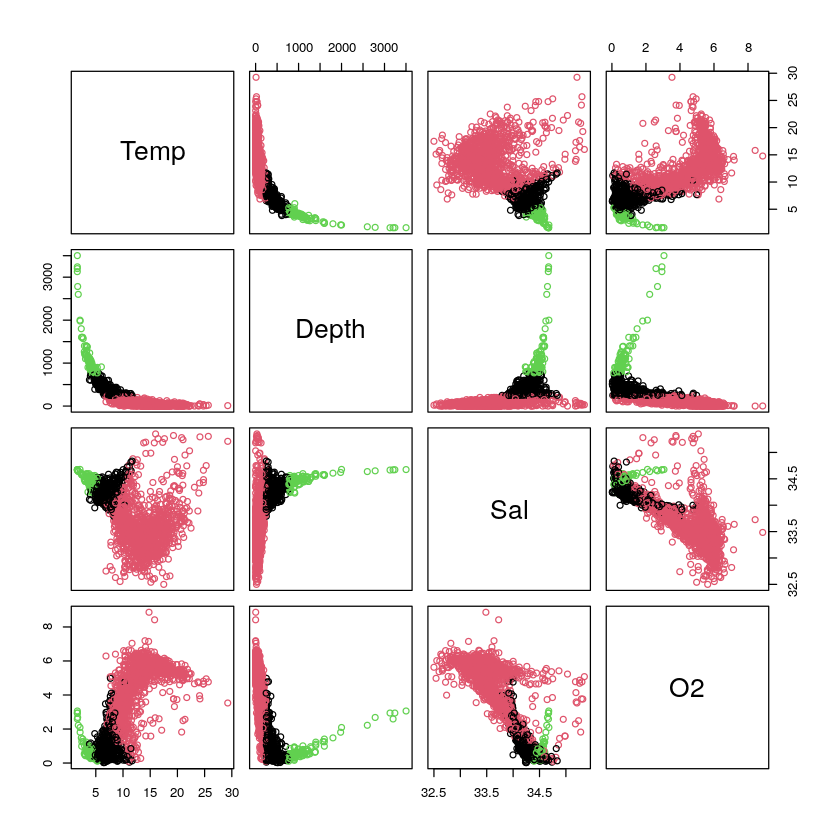

In [10]:
pairs(ocean, col=ocean.kmeans3$cluster )

Investigate the stability of your solution (in terms of the total within sum of squares) with respect to changing the optional parameters `algorithm` and `nstart` in `kmeans`. 

In [11]:
kmeans(ocean, centers=3, algorithm="Lloyd")$tot.withinss
kmeans(ocean, centers=3, algorithm="Lloyd", nstart=5)$tot.withinss
kmeans(ocean, centers=3, algorithm="MacQueen")$tot.withinss
kmeans(ocean, centers=3, algorithm="MacQueen", nstart=5)$tot.withinss
kmeans(ocean, centers=3, algorithm="Hartigan-Wong")$tot.withinss
kmeans(ocean, centers=3, algorithm="Hartigan-Wong", nstart=5)$tot.withinss


[1] 48630479

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


[1] 48630479

[1] 48630479

[1] 48630479

[1] 48630479

[1] 48630479

Now, repeat the analysis above (carry out the k-means clustering, display the within total sum-of squares, and produce the colored pairs plot indicating the cluster centers), for $K=2$, $K=4$, and $K=5$.

[1] 88770758

[1] 38284645

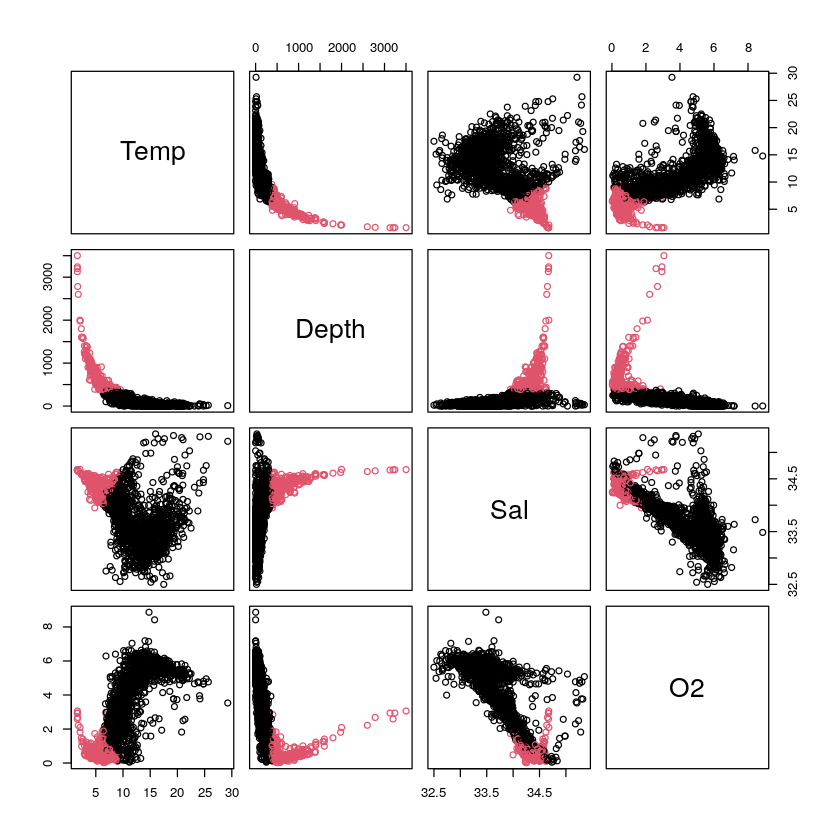

Warning message:
“did not converge in 10 iterations”


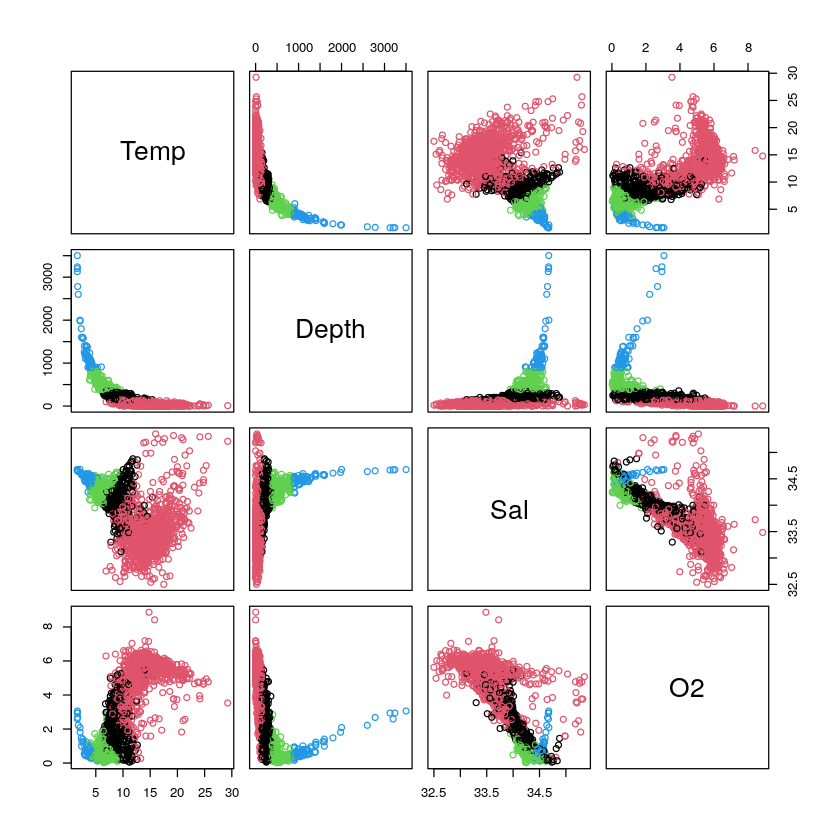

[1] 37359519

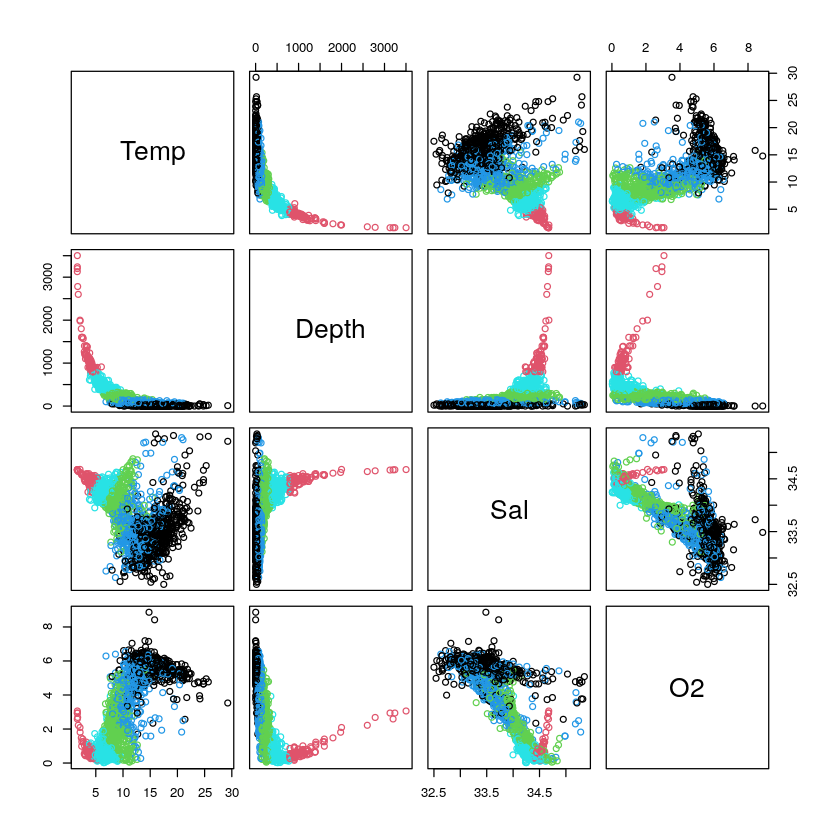

In [12]:
ocean.kmeans2<- kmeans(ocean, centers=2)
ocean.kmeans2$tot.withinss
pairs(ocean, col=ocean.kmeans2$cluster )

ocean.kmeans4<- kmeans(ocean, centers=4)
ocean.kmeans4$tot.withinss
pairs(ocean, col=ocean.kmeans4$cluster )

ocean.kmeans5<- kmeans(ocean, centers=5, algorithm="Lloyd")
pairs(ocean, col=ocean.kmeans5$cluster )
ocean.kmeans5$tot.withinss


To include this lab, we consider Mahalanobis distances in order to identify outliers and check for multivariate normality.  Firstly, we compute the (squared) Mahalanobis distances. Therefore, execute function `mahalanobis` with options `center=m` and `cov=Sigma`. Save the output into a vector `ocean.Mdist'.

In [13]:
ocean.Mdist <-  mahalanobis(ocean, center=m, cov=Sigma)

Now, let's check for outliers. Identify all observations which exceed the $0.5\%$ tail quantile of a $\chi^2$ distribution with four degrees of freedom. How many outliers are these? How many would we expect purely at random?

In [14]:
ocean.out <- ocean.Mdist >qchisq(0.995,4)
a <- which(ocean.out)
length(a)
# at random
0.005*2500

[1] 74

[1] 12.5

We would like to visualize this result. Produce once more a `pairs` plot, this time with all outliers given a different color to the bulk of the data.

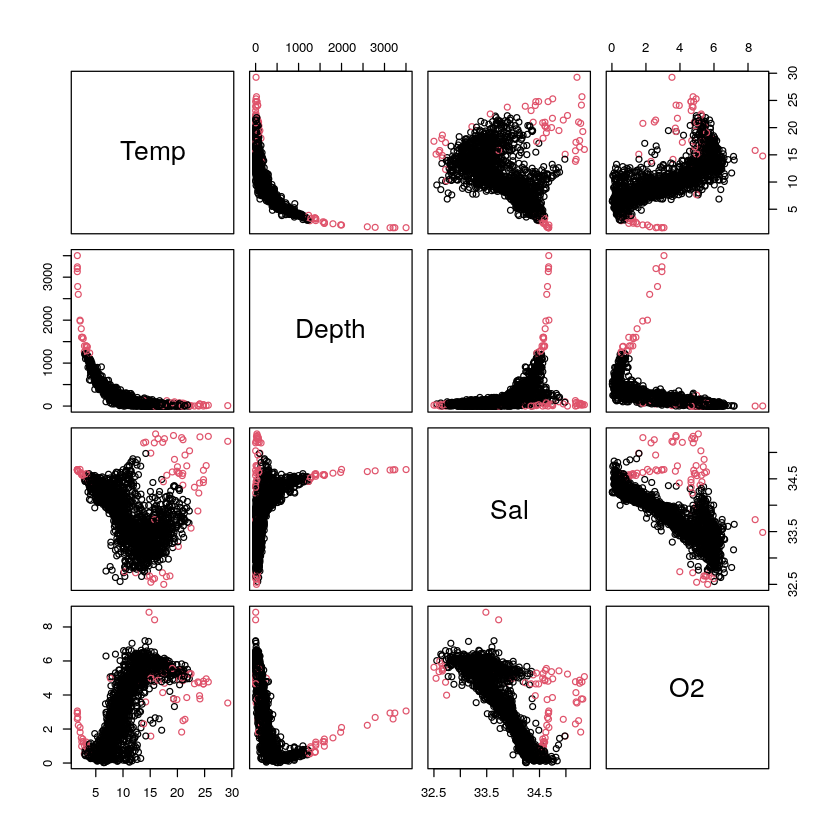

In [15]:
pairs(ocean, col=ocean.out+1)

Now produce the QQ-plot to check for multivariate normality (from all what we have seen so far, it appears very unlikely that the data are multivariate normally distributed, but it is still insightful to check for this).

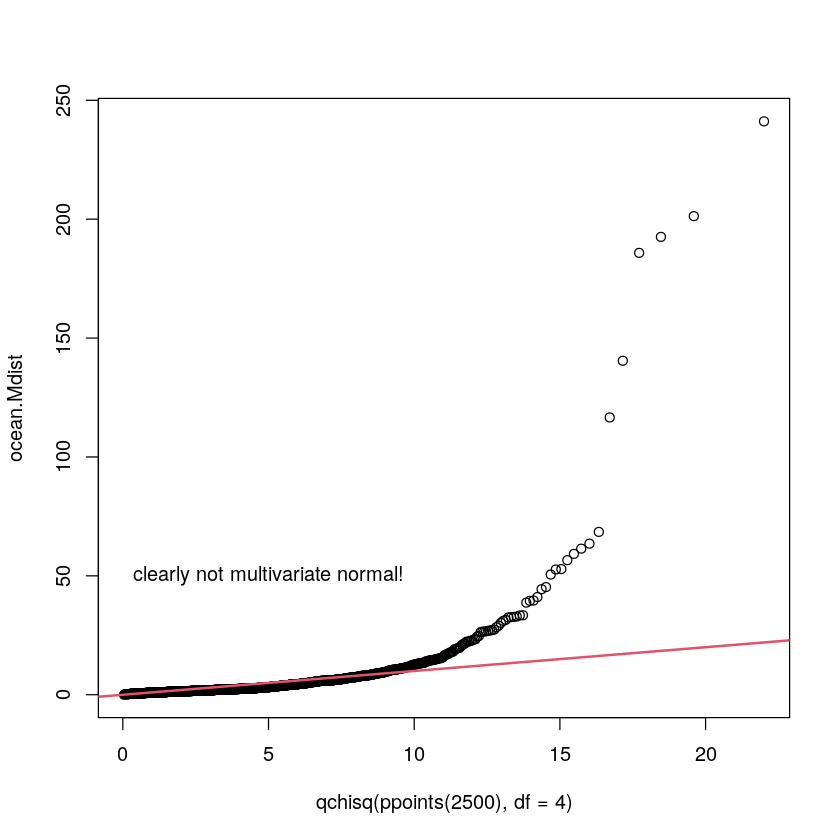

In [16]:
qqplot(qchisq(ppoints(2500), df=4),ocean.Mdist)
abline(a=0,b=1, col=2, lwd=2)
text(5,50, "clearly not multivariate normal!")